In [1]:
# pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb #pip install xgboost
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df=pd.read_csv('Telco-Customer-Churn_XGboost.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.columns=df.columns.str.replace(' ','_')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum() 
## not sure there is nothing null values ..so check each cols one by one

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
len(df.loc[df['TotalCharges']==' ']) 
# no of total whitespace in TotalCharges

11

In [12]:
df.loc[df['TotalCharges']==' '] 
# 11 cols thats have white space

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.loc[(df['TotalCharges']==' '),'TotalCharges']=0

#df.loc[df['tenure']==0]

In [14]:
#convert to numeric 
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [15]:
#convert white space into _

df.replace(' ','_',regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One_year', 'Two_year'], dtype=object)

#### EDA 

Text(0.5, 1.0, 'Gender Distribution')

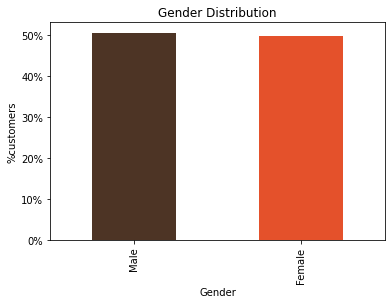

In [17]:
import matplotlib.ticker as mtick

colors=['#4D3425','#E4512B']

ax=(df['gender'].value_counts()*100/len(df)).plot(kind='bar',stacked=True,color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('%customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

Text(0.5, 0, '% Senior citizens')

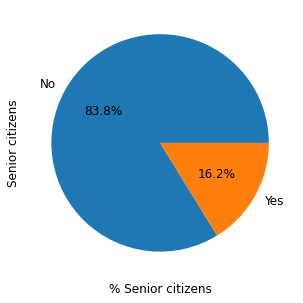

In [18]:
ax=(df['SeniorCitizen'].value_counts()*100/len(df)).plot.pie(autopct='%.1f%%',labels=['No','Yes'],figsize=(5,5),fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior citizens',fontsize=12)
ax.set_xlabel('% Senior citizens',fontsize=12)

/home/sasikala/yes/envs/venv2/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of customers by their tenure')

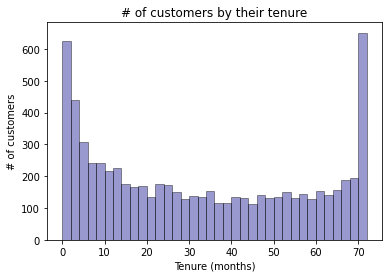

In [19]:
ax=sns.distplot(df['tenure'],hist=True,kde=False,bins=int(180/5),color='darkblue',
                hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

ax.set_ylabel('# of customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of customers by their tenure')

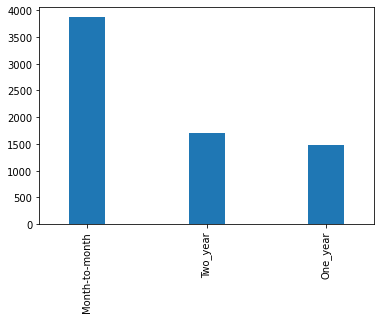

In [20]:
ax=df['Contract'].value_counts().plot(kind='bar',width=0.3)

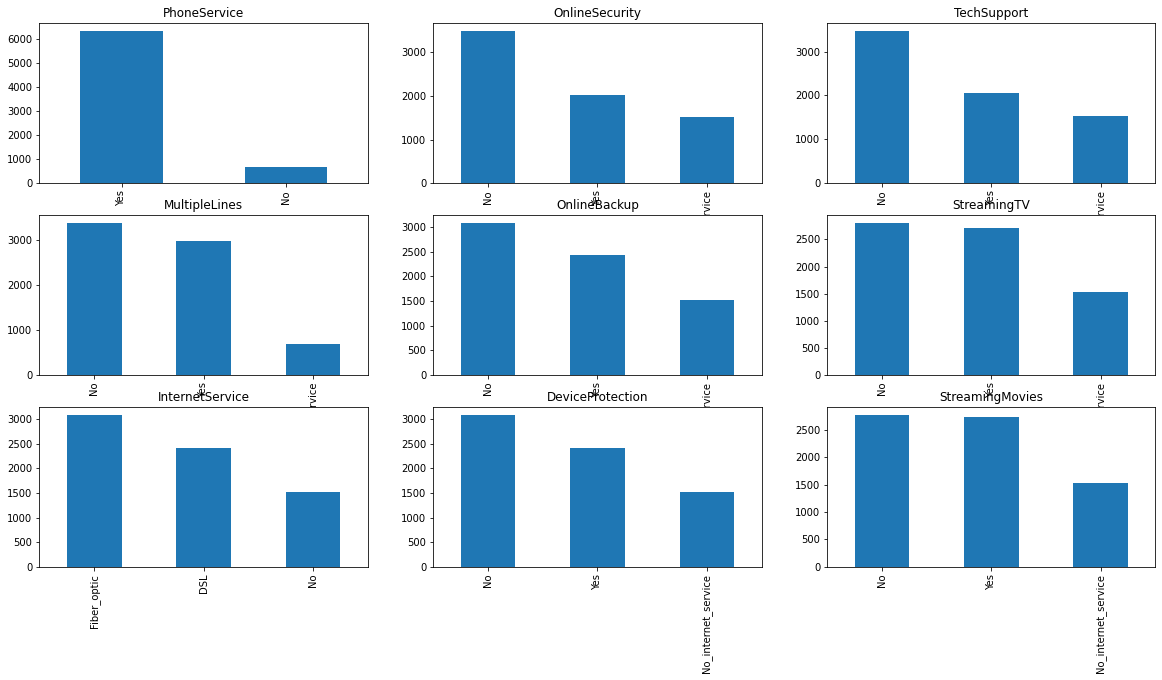

In [21]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,10))
for i,item in enumerate(services):
    if i<3:
        ax=df[item].value_counts().plot(kind='bar',ax=axes[i,0])
    
    elif i>=3 and i<6:
         ax=df[item].value_counts().plot(kind='bar',ax=axes[i-3,1])
    
    elif i<9:
         ax=df[item].value_counts().plot(kind='bar',ax=axes[i-6,2])
    ax.set_title(item)

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One_year        1307   166
Two_year        1647    48


Text(0.5, 1.0, 'Churn by contract rate')

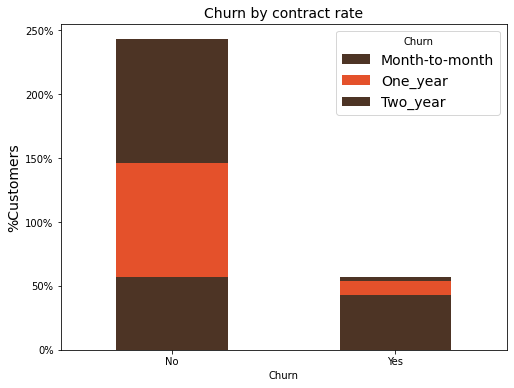

In [22]:
colors=['#4D3425','#E4512B']
contract_churn=df.groupby(['Contract','Churn']).size().unstack()
print(contract_churn)


ax=(contract_churn.T*100.0/contract_churn.T.sum()).plot(kind='bar',stacked=True,
                                                       rot=0,color=colors,figsize=(8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title='Churn')
ax.set_ylabel('%Customers',size=14)
ax.set_title('Churn by contract rate',size=14)


Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


Text(0.5, 1.0, 'Churn by senior citizen rate')

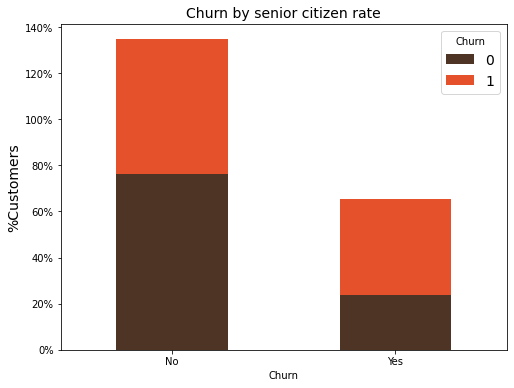

In [23]:
colors=['#4D3425','#E4512B']
senior_churn=df.groupby(['SeniorCitizen','Churn']).size().unstack()
print(senior_churn)


ax=(senior_churn.T*100.0/senior_churn.T.sum()).plot(kind='bar',stacked=True,
                                                       rot=0,color=colors,figsize=(8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title='Churn')
ax.set_ylabel('%Customers',size=14)
ax.set_title('Churn by senior citizen rate',size=14)


In [24]:
for item in df.columns:
    print(item)
    print(df[item].unique()) 

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No_phone_service' 'No' 'Yes']
InternetService
['DSL' 'Fiber_optic' 'No']
OnlineSecurity
['No' 'Yes' 'No_internet_service']
OnlineBackup
['Yes' 'No' 'No_internet_service']
DeviceProtection
['No' 'Yes' 'No_internet_service']
TechSupport
['No' 'Yes' 'No_internet_service']
StreamingTV
['No' 'Yes' 'No_internet_service']
StreamingMovies
['No' 'Yes' 'No_internet_service']
Contract
['Month-to-month' 'One_year' 'Two_year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic_check' 'Mailed_check' 'Bank_transfer_(automatic)'
 'Credit_card_(automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.

In [25]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
#convert into lowercase

for item in df.columns:
    try:
        df[item]=df[item].str.lower()
    except:
        print(item,'couldnt convert')
df.head()

SeniorCitizen couldnt convert
tenure couldnt convert
MonthlyCharges couldnt convert
TotalCharges couldnt convert


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
col_to_convert=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for item in col_to_convert:
    df[item].replace(to_replace='yes',value=1,inplace=True)
    df[item].replace(to_replace='no',value=0,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,1,0,1,0,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic_check,29.85,29.85,0
1,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one_year,0,mailed_check,56.95,1889.50,0
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed_check,53.85,108.15,1
3,male,0,0,0,45,0,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,0,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,0,0,2,1,no,fiber_optic,no,no,no,no,no,no,month-to-month,1,electronic_check,70.70,151.65,1


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

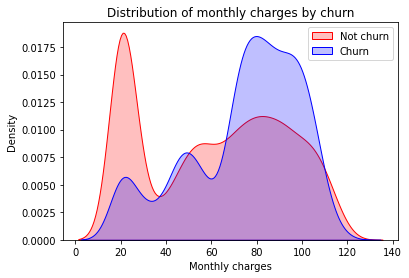

In [29]:
ax=sns.kdeplot(df.MonthlyCharges[(df['Churn']==0)],
               color='Red',shade=True)

ax=sns.kdeplot(df.MonthlyCharges[(df['Churn']==1)],
              ax=ax,color='Blue',shade=True)

ax.legend(['Not churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

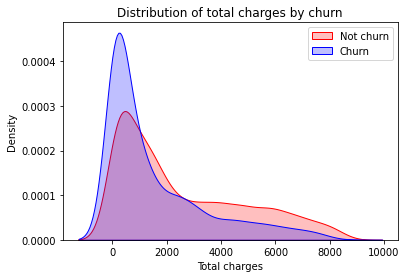

In [30]:
ax=sns.kdeplot(df.TotalCharges[(df['Churn']==0)],
               color='Red',shade=True)

ax=sns.kdeplot(df.TotalCharges[(df['Churn']==1)],
              ax=ax,color='Blue',shade=True)

ax.legend(['Not churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total charges')
ax.set_title('Distribution of total charges by churn')

In [31]:
churn_numb=len(df[df['Churn']==1])
churn_numb

1869

In [32]:
nonchurn_numb=len(df[df['Churn']==0])
nonchurn_numb

5174

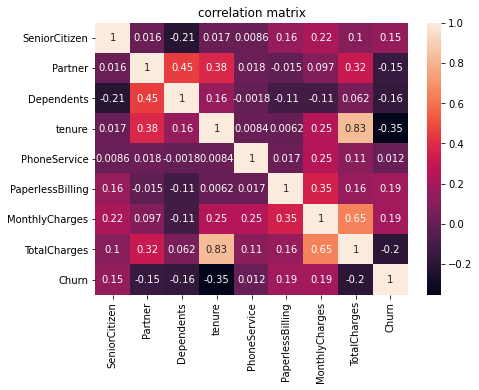

In [33]:
plt.figure(figsize=(7,5))
c=df.corr()
sns.heatmap(c,annot=True)
plt.title('correlation matrix')
plt.show()

In [34]:
ml_dummies=pd.get_dummies(df)
ml_dummies.fillna(value=0,inplace=True)
ml_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,...,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

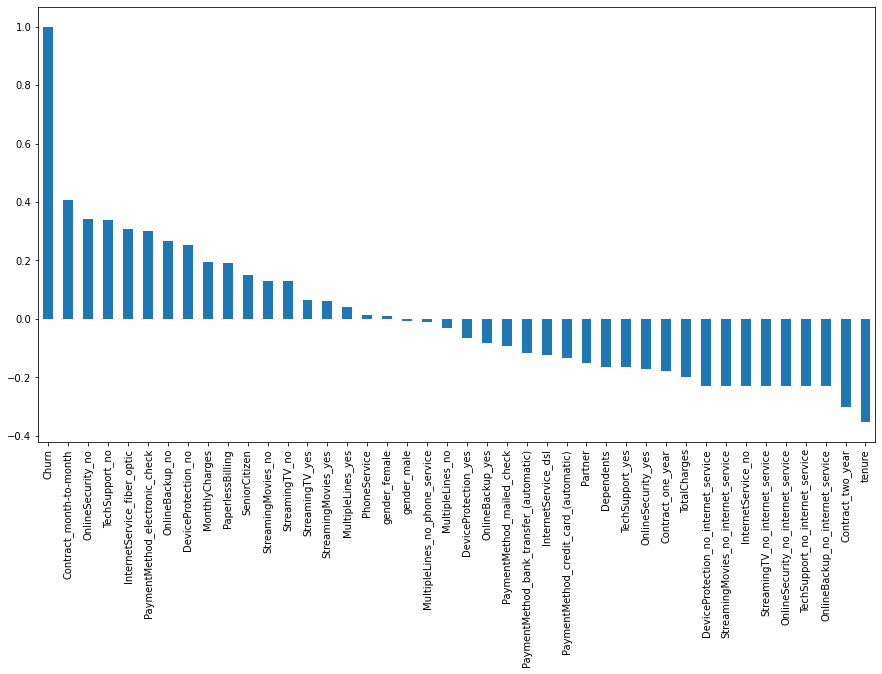

In [35]:
#we can see correlation in line

plt.figure(figsize=(15,8))
ml_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


In [36]:
x=ml_dummies.drop('Churn',axis=1).copy()
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_female,gender_male,...,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,0,1,0,1,29.85,29.85,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,0,1,0,0,0,0,1,0


In [37]:
y=ml_dummies['Churn'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [38]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [39]:
sum(y)/len(y)

0.2653698707936959

In [40]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,stratify=y)



In [41]:
# building a priliminary model

clf_xgb=xgb.XGBClassifier(objective='binary:logistic',missing=1,seed=42)
clf_xgb.fit(xtrain,ytrain,verbose=True,early_stopping_rounds=10,\
            eval_metric='aucpr',eval_set=[(xtest,ytest)])

[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538


/home/sasikala/yes/envs/venv2/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64461
[4]	validation_0-aucpr:0.64114
[5]	validation_0-aucpr:0.64016
[6]	validation_0-aucpr:0.64620
[7]	validation_0-aucpr:0.64003
[8]	validation_0-aucpr:0.63913
[9]	validation_0-aucpr:0.64153
[10]	validation_0-aucpr:0.64172
[11]	validation_0-aucpr:0.63950
[12]	validation_0-aucpr:0.63687
[13]	validation_0-aucpr:0.63473
[14]	validation_0-aucpr:0.63442
[15]	validation_0-aucpr:0.63634
[16]	validation_0-aucpr:0.63597


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

/home/sasikala/yes/envs/venv2/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


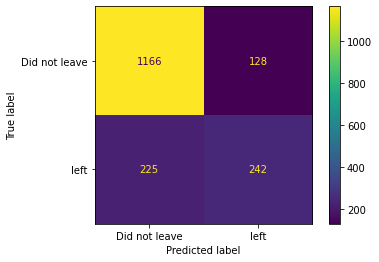

In [42]:
plot_confusion_matrix(clf_xgb,xtest,ytest,values_format='d',display_labels=['Did not leave','left'])

In [43]:
# 1166+128
1166/1294

0.9010819165378671

In [44]:
225+242
242/467

0.5182012847965739

In [45]:
#hyperparameter tuning part1

# param_grid={
#     'max_depth':[3,4,5],
#     'learning_rate':[0.1,0.01,0.05],
#     'gamma':[0,0.25,1.0],
#     'reg_lambda':[0,1.0,10.0],
#     'scale_pos_weight':[1,3,5]
# }

# optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                                        seed=42,subsample=0.9,colsample_bytree=0.5),
#                            param_grid=param_grid,scoring='roc_auc',verbose=0,n_jobs=1,cv=3)

# optimal_params.fit(xtrain,ytrain,early_stopping_rounds=10,\
#                   eval_metric='auc',eval_set=[(xtest,ytest)],verbose=1)

# print(optimal_params.best_params_)

In [46]:
#hyperparameter tuning with previous value
# {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}



# param_grid={
#     'max_depth':[4],
#     'learning_rate':[0.05,0.07],
#     'gamma':[0,0.1,0.25],
#     'reg_lambda':[10.0,20,100],
#     'scale_pos_weight':[1,2]
# }

# optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                                        seed=42,subsample=0.9,colsample_bytree=0.5),
#                            param_grid=param_grid,scoring='roc_auc',verbose=0,n_jobs=1,cv=3)

# optimal_params.fit(xtrain,ytrain,early_stopping_rounds=10,\
#                   eval_metric='auc',eval_set=[(xtest,ytest)],verbose=1)

# print(optimal_params.best_params_)

In [47]:
## final model with above tuning values

clf_xgb=xgb.XGBClassifier(seed=42,
                         gamma=0.25,
                         learning_rate=0.07,
                         max_depth=4,
                         reg_lambda=20,
                         scale_pos_weight=1)

model=clf_xgb.fit(xtrain,ytrain,verbose=True,early_stopping_rounds=10,
                 eval_metric='aucpr',eval_set=[(xtest,ytest)])
model

[0]	validation_0-aucpr:0.58636
[1]	validation_0-aucpr:0.58636
[2]	validation_0-aucpr:0.59144
[3]	validation_0-aucpr:0.59195


/home/sasikala/yes/envs/venv2/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[4]	validation_0-aucpr:0.59300
[5]	validation_0-aucpr:0.60188
[6]	validation_0-aucpr:0.60379
[7]	validation_0-aucpr:0.60856
[8]	validation_0-aucpr:0.61086
[9]	validation_0-aucpr:0.61131
[10]	validation_0-aucpr:0.61828
[11]	validation_0-aucpr:0.62236
[12]	validation_0-aucpr:0.62288
[13]	validation_0-aucpr:0.62646
[14]	validation_0-aucpr:0.62979
[15]	validation_0-aucpr:0.63512
[16]	validation_0-aucpr:0.63080
[17]	validation_0-aucpr:0.63038
[18]	validation_0-aucpr:0.63068
[19]	validation_0-aucpr:0.63101
[20]	validation_0-aucpr:0.63130
[21]	validation_0-aucpr:0.63154
[22]	validation_0-aucpr:0.63215
[23]	validation_0-aucpr:0.63360
[24]	validation_0-aucpr:0.63489


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=20, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

/home/sasikala/yes/envs/venv2/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


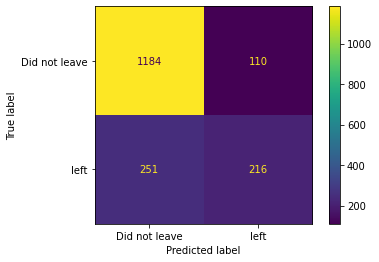

In [48]:
plot_confusion_matrix(clf_xgb,xtest,ytest,values_format='d',display_labels=['Did not leave','left'])

In [49]:
1184+110
1184/1294

0.9149922720247295

In [50]:
251+216
251/467

0.5374732334047109

In [51]:
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s:'%importance_type,bst.get_score(importance_type=importance_type))
    
node_pparams={
    'shape':'box',
    'style':'filled,rounded',
    'fillcolor':'#78cbe'
}

leaf_params={
    'shape':'box',
    'style':'filled',
    'fillcolor':'#e48038'
}

weight: {'Contract_month-to-month': 24, 'InternetService_fiber_optic': 10, 'tenure': 46, 'TechSupport_no': 14, 'OnlineSecurity_no': 20, 'PaymentMethod_electronic_check': 16, 'MonthlyCharges': 69, 'SeniorCitizen': 5, 'PaperlessBilling': 14, 'PhoneService': 2, 'TotalCharges': 46, 'Partner': 1, 'OnlineBackup_no': 5, 'Contract_one_year': 7, 'StreamingMovies_no': 2, 'MultipleLines_no': 6, 'MultipleLines_yes': 2, 'PaymentMethod_mailed_check': 1, 'Contract_two_year': 2, 'StreamingMovies_yes': 2, 'gender_female': 1, 'OnlineBackup_yes': 2, 'PaymentMethod_credit_card_(automatic)': 1}
gain: {'Contract_month-to-month': 228.2540852, 'InternetService_fiber_optic': 107.44784653399999, 'tenure': 30.906794308847832, 'TechSupport_no': 49.56513336928572, 'OnlineSecurity_no': 34.990343458, 'PaymentMethod_electronic_check': 11.794196551875, 'MonthlyCharges': 6.7356967477681176, 'SeniorCitizen': 1.944330214, 'PaperlessBilling': 10.443488965, 'PhoneService': 2.0008735665, 'TotalCharges': 8.854710482630434, '